<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:44: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_3813/1105477197.py:44: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=100 $M_{\odot}$')
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_3813/1105477197.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('txt/SB99.dat', delim_whitespace=True, header=None)


0     3.878728e+06
1     4.202966e+06
2     4.532236e+06
3     5.936280e+06
4     2.729769e+06
5     3.336274e+06
6     4.743825e+06
7     2.872207e+06
8     3.658933e+06
9     4.568526e+06
10    4.931174e+06
11    5.026674e+06
Name: Age_Solid, dtype: float64


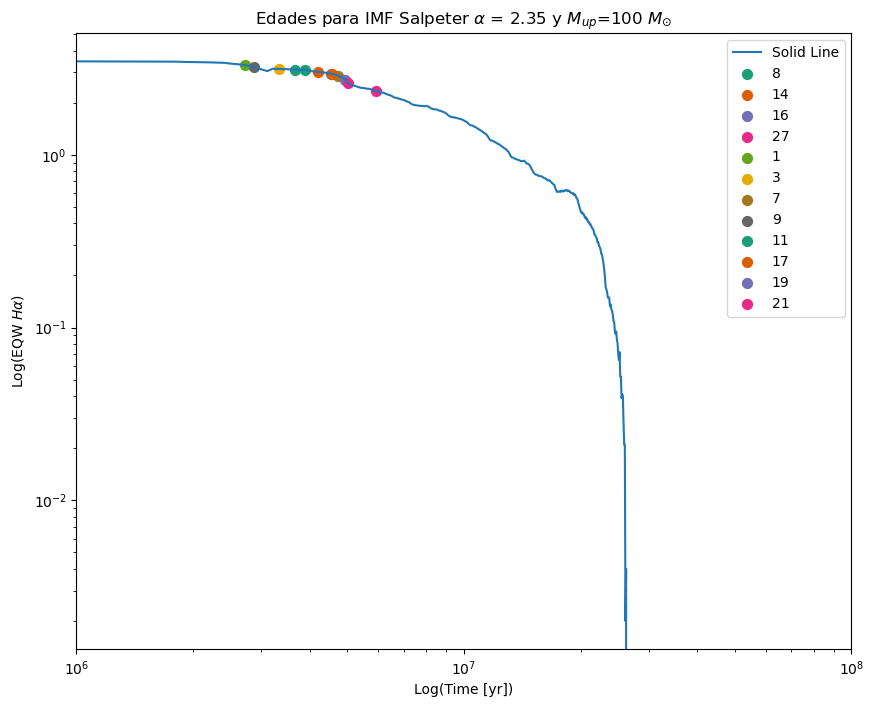

In [12]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('txt/SB99.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']
interpolate_solid = interp1d(starburst_data['Solid'], starburst_data['Time'])

eqw_data = pd.read_csv('txt/measurement_emission_lines_mask2.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[12,13,14,15,16])

eqw_data['Age_Solid'] = interpolate_solid(np.log10(eqw_data['H_ALPHA_EQW'].tolist()))
print(eqw_data['Age_Solid'])

# Obtener una paleta de colores con 8 colores diferentes
#palette = sns.color_palette("Dark2", n_colors=8)
#color_map = {id: color for id, color in zip(eqw_data['ID'].unique(), palette)}

# Obtener todos los IDs únicos en eqw_data para asegurar que color_map esté actualizado
unique_ids = eqw_data['ID'].unique()
palette = sns.color_palette("Dark2", n_colors=len(unique_ids))
color_map = {id: color for id, color in zip(unique_ids, palette)}

plt.figure(figsize=(10, 8))

# Graficar los datos de StarBurst99
plt.plot(starburst_data['Time'], starburst_data['Solid'], '-', label='Solid Line')

# Graficar los puntos con diferentes colores según el ID
for id in eqw_data['ID'].unique():
    subset = eqw_data[eqw_data['ID'] == id]
    plt.scatter(subset['Age_Solid'], np.log10(subset['H_ALPHA_EQW']), color=color_map[id], label=f'{id}', s=50)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**8)
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW $H\\alpha$)')
plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=100 $M_{\odot}$')
plt.legend()
plt.show()


<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:44: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_3813/254707115.py:44: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Edades para IMF $\\alpha$ = 3.30 y $M_{up}$=100 $M_{\odot}$')
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_3813/254707115.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('txt/SB99.dat', delim_whitespace=True, header=None)


0     2.723091e+06
1     2.991122e+06
2     3.821689e+06
3     5.941243e+06
4     7.205322e+06
5     2.480551e+06
6     4.206773e+06
7     3.400489e+06
8     2.794803e+06
9     3.881567e+06
10    4.813036e+06
11    4.985076e+06
Name: Age_LongDashed, dtype: float64


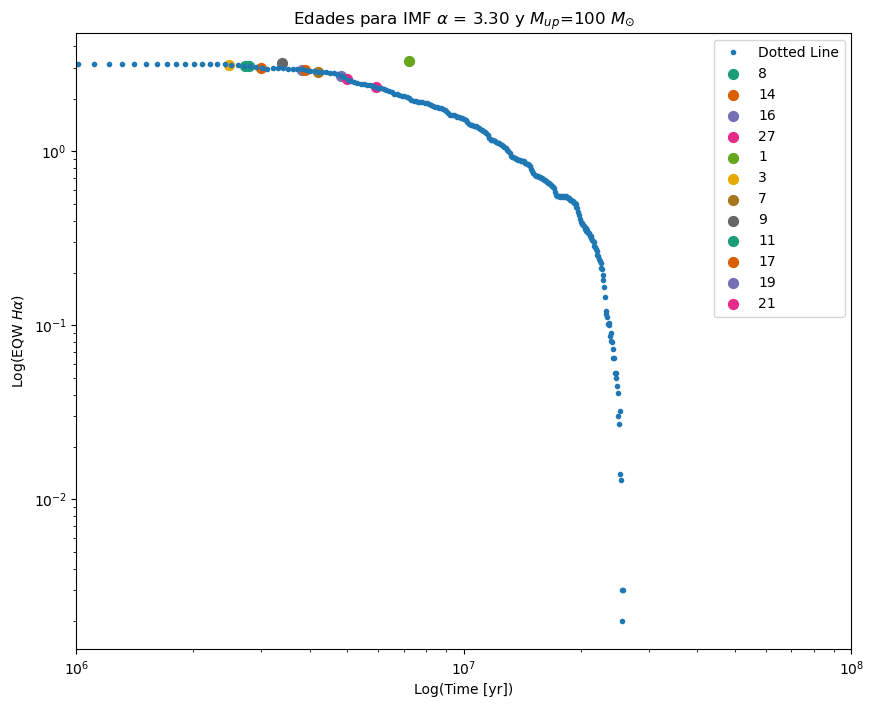

In [16]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('txt/SB99.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']
interpolate_solid = interp1d(starburst_data['LongDashed'], starburst_data['Time'], fill_value='extrapolate')

eqw_data = pd.read_csv('txt/measurement_emission_lines_mask2.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[12,13,14,15,16])

eqw_data['Age_LongDashed'] = interpolate_solid(np.log10(eqw_data['H_ALPHA_EQW'].tolist()))
print(eqw_data['Age_LongDashed'])

# Obtener una paleta de colores con 8 colores diferentes
#palette = sns.color_palette("Dark2", n_colors=8)
#color_map = {id: color for id, color in zip(eqw_data['ID'].unique(), palette)}

# Obtener todos los IDs únicos en eqw_data para asegurar que color_map esté actualizado
unique_ids = eqw_data['ID'].unique()
palette = sns.color_palette("Dark2", n_colors=len(unique_ids))
color_map = {id: color for id, color in zip(unique_ids, palette)}

plt.figure(figsize=(10, 8))

# Graficar los datos de StarBurst99
plt.plot(starburst_data['Time'], starburst_data['LongDashed'], '.', label='Dotted Line')

# Graficar los puntos con diferentes colores según el ID
for id in eqw_data['ID'].unique():
    subset = eqw_data[eqw_data['ID'] == id]
    plt.scatter(subset['Age_LongDashed'], np.log10(subset['H_ALPHA_EQW']), color=color_map[id], label=f'{id}', s=50)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**8)
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW $H\\alpha$)')
plt.title('Edades para IMF $\\alpha$ = 3.30 y $M_{up}$=100 $M_{\odot}$')
plt.legend()
plt.show()

<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:44: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_3813/3719497508.py:44: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=30 $M_{\odot}$')
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_3813/3719497508.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('txt/SB99.dat', delim_whitespace=True, header=None)


0     2.474604e+06
1     4.681338e+06
2     5.721126e+06
3     6.737446e+06
4     4.928193e+07
5     8.370626e+05
6     6.020709e+06
7     2.645293e+07
8     3.701498e+06
9     5.761045e+06
10    6.416281e+06
11    6.547987e+06
Name: Age_ShortDashed, dtype: float64


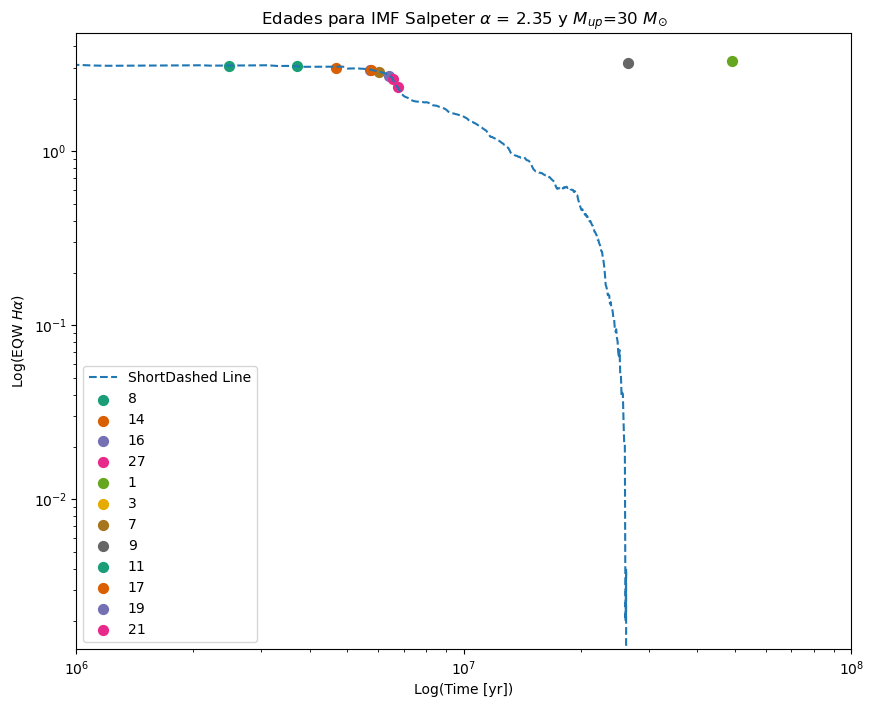

In [15]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('txt/SB99.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']
interpolate_solid = interp1d(starburst_data['ShortDashed'], starburst_data['Time'], fill_value='extrapolate')

eqw_data = pd.read_csv('txt/measurement_emission_lines_mask2.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[12,13,14,15,16])

eqw_data['Age_ShortDashed'] = interpolate_solid(np.log10(eqw_data['H_ALPHA_EQW'].tolist()))
print(eqw_data['Age_ShortDashed'])

# Obtener una paleta de colores con 8 colores diferentes
#palette = sns.color_palette("Dark2", n_colors=8)
#color_map = {id: color for id, color in zip(eqw_data['ID'].unique(), palette)}

# Obtener todos los IDs únicos en eqw_data para asegurar que color_map esté actualizado
unique_ids = eqw_data['ID'].unique()
palette = sns.color_palette("Dark2", n_colors=len(unique_ids))
color_map = {id: color for id, color in zip(unique_ids, palette)}

plt.figure(figsize=(10, 8))

# Graficar los datos de StarBurst99
plt.plot(starburst_data['Time'], starburst_data['ShortDashed'], '--', label='ShortDashed Line')

# Graficar los puntos con diferentes colores según el ID
for id in eqw_data['ID'].unique():
    subset = eqw_data[eqw_data['ID'] == id]
    plt.scatter(subset['Age_ShortDashed'], np.log10(subset['H_ALPHA_EQW']), color=color_map[id], label=f'{id}', s=50)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**8)
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW $H\\alpha$)')
plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=30 $M_{\odot}$')
plt.legend()
plt.show()

Scarano+2008



cos($\theta$) = $\dfrac{-(\alpha-\alpha_0)sin(\phi)cos(\delta) + (\delta - \delta_0)cos(\phi)}{r}$

sin($\theta$) = $\dfrac{-(\alpha-\alpha_0)cos(\phi)cos(\delta) - (\delta - \delta_0)sin(\phi)}{r cos(i)}$


$\alpha_0, \delta_0$ : coordenadas centrales de la galaxia (kinematic center)

$\alpha, \delta$ : coordenadas de las regiones SF

$\phi$ : ángulo de posición de la galaxia (position angle of the receding semi-major axis)

$\theta$ : ángulo azimutal (relacionado con las coordenadas polares r,$\theta$)

i : inclinación de la galaxia (inclination between the normal to the plane of the galaxy and the line-of-sight)

r : posición de la región de formación estelar desde el centro de la galaxia

r & $\theta$ are the polar coordinates inside the plane of the galactic disk





In [ ]:
#Cálculo de distancia deproyectada desde el centro de la galaxia hasta las regiones SF


In [ ]:
import numpy as np

# Datos de entrada
alpha_0, delta_0 = 0.0, 0.0  # Coordenadas del centro en grados
alpha = [10.0, 15.0]  # Coordenadas de las regiones en grados
delta = [20.0, 25.0]  # Coordenadas de las regiones en grados
phi = 30.0  # Ángulo de posición en grados
i = 60.0  # Inclinación en grados
D = 4200  # Distancia a la galaxia en kpc (4.2 Mpc)

# Convertir a radianes
alpha_0_rad = np.radians(alpha_0)
delta_0_rad = np.radians(delta_0)
alpha_rad = np.radians(alpha)
delta_rad = np.radians(delta)
phi_rad = np.radians(phi)
i_rad = np.radians(i)

# Calcular r para cada región
for a, d in zip(alpha_rad, delta_rad):
    # Calcular los componentes x e y
    x = -(a - alpha_0_rad) * np.sin(phi_rad) * np.cos(d) + (d - delta_0_rad) * np.cos(phi_rad)
    y = -(a - alpha_0_rad) * np.cos(phi_rad) * np.cos(d) - (d - delta_0_rad) * np.sin(phi_rad)

    # Calcular el ángulo theta
    theta = np.arctan2(y, x)  # en radianes

    # Calcular la distancia proyectada en kpc
    r_kpc = D * np.tan(theta)

    # Imprimir el resultado
    print(f'Distancia proyectada en kpc: {r_kpc}')


In [1]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

# Parámetros cosmológicos
H0 = 67.8  # Constante de Hubble en km/s/Mpc, de NED
Om0 = 0.308  # Densidad de materia en el universo plano (puedes ajustar según lo necesario)
cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)

# Redshift de la galaxia
z = 0.001568

# Calcular la distancia de luminosidad en Mpc
D = cosmo.angular_diameter_distance(z).value  # en Mpc

# Distancia angular en arcsec
# para las regiones SF observadas (de ds9)
theta_arcsec_8 = 186.082
theta_arcsec_14 = 243.849
theta_arcsec_16 = 246.580
theta_arcsec_27 = 219.101

theta_arcsec_1 = 70.135
theta_arcsec_3 = 77.639
theta_arcsec_5 = 80.253 #79.437 (cuando pongo línea al inicio de la SF region, si la pongo en la max intensidad de Ha entonces 80)
theta_arcsec_7 = 44.245
theta_arcsec_9 = 73.598
theta_arcsec_11 = 82.945
theta_arcsec_13 = 132.034
theta_arcsec_15 = 16.404
theta_arcsec_17 = 152.517
theta_arcsec_19 = 95.697
theta_arcsec_21 = 68.644
theta_arcsec_23 = 53.192

# Convertir arcsec a radianes
theta_rad_8 = theta_arcsec_8 * u.arcsec.to(u.radian)
theta_rad_14 = theta_arcsec_14 * u.arcsec.to(u.radian)
theta_rad_16 = theta_arcsec_16 * u.arcsec.to(u.radian)
theta_rad_27 = theta_arcsec_27 * u.arcsec.to(u.radian)

theta_rad_1 = theta_arcsec_1 * u.arcsec.to(u.radian)
theta_rad_3 = theta_arcsec_3 * u.arcsec.to(u.radian)
theta_rad_5 = theta_arcsec_5 * u.arcsec.to(u.radian)
theta_rad_7 = theta_arcsec_7 * u.arcsec.to(u.radian)
theta_rad_9 = theta_arcsec_9 * u.arcsec.to(u.radian)
theta_rad_11 = theta_arcsec_11 * u.arcsec.to(u.radian)
theta_rad_13 = theta_arcsec_13 * u.arcsec.to(u.radian)
theta_rad_15 = theta_arcsec_15 * u.arcsec.to(u.radian)
theta_rad_17 = theta_arcsec_17 * u.arcsec.to(u.radian)
theta_rad_19 = theta_arcsec_19 * u.arcsec.to(u.radian)
theta_rad_21 = theta_arcsec_21 * u.arcsec.to(u.radian)
theta_rad_23 = theta_arcsec_23 * u.arcsec.to(u.radian)

# Calcular la distancia física en kpc
d_kpc_8 = D * theta_rad_8 * 1000
d_kpc_14 = D * theta_rad_14 * 1000
d_kpc_16 = D * theta_rad_16 * 1000
d_kpc_27 = D * theta_rad_27 * 1000

d_kpc_1 = D * theta_rad_1 * 1000  # Convertir Mpc a kpc
d_kpc_3 = D * theta_rad_3 * 1000
d_kpc_5 = D * theta_rad_5 * 1000
d_kpc_7 = D * theta_rad_7 * 1000
d_kpc_9 = D * theta_rad_9 * 1000
d_kpc_11 = D * theta_rad_11 * 1000
d_kpc_13 = D * theta_rad_13 * 1000
d_kpc_15 = D * theta_rad_15 * 1000
d_kpc_17 = D * theta_rad_17 * 1000
d_kpc_19 = D * theta_rad_19 * 1000
d_kpc_21 = D * theta_rad_21 * 1000
d_kpc_23 = D * theta_rad_23 * 1000

print(f"Distancia física desde slit 8 al centro de NGC1313: {d_kpc_8:.3f} kpc")
print(f"Distancia física desde slit 14 al centro de NGC1313: {d_kpc_14:.3f} kpc")
print(f"Distancia física desde slit 16 al centro de NGC1313: {d_kpc_16:.3f} kpc")
print(f"Distancia física desde slit 27 al centro de NGC1313: {d_kpc_27:.3f} kpc")

print(f"Distancia física desde slit 1 al centro de NGC1313: {d_kpc_1:.3f} kpc")
print(f"Distancia física desde slit 3 al centro de NGC1313: {d_kpc_3:.3f} kpc")
print(f"Distancia física desde slit 5 al centro de NGC1313: {d_kpc_5:.3f} kpc")
print(f"Distancia física desde slit 7 al centro de NGC1313: {d_kpc_7:.3f} kpc")
print(f"Distancia física desde slit 9 al centro de NGC1313: {d_kpc_9:.3f} kpc")
print(f"Distancia física desde slit 11 al centro de NGC1313: {d_kpc_11:.3f} kpc")
print(f"Distancia física desde slit 13 al centro de NGC1313: {d_kpc_13:.3f} kpc")
print(f"Distancia física desde slit 15 al centro de NGC1313: {d_kpc_15:.3f} kpc")
print(f"Distancia física desde slit 17 al centro de NGC1313: {d_kpc_17:.3f} kpc")
print(f"Distancia física desde slit 19 al centro de NGC1313: {d_kpc_19:.3f} kpc")
print(f"Distancia física desde slit 21 al centro de NGC1313: {d_kpc_21:.3f} kpc")
print(f"Distancia física desde slit 23 al centro de NGC1313: {d_kpc_23:.3f} kpc")

Distancia física desde slit 8 al centro de NGC1313: 6.243 kpc
Distancia física desde slit 14 al centro de NGC1313: 8.181 kpc
Distancia física desde slit 16 al centro de NGC1313: 8.272 kpc
Distancia física desde slit 27 al centro de NGC1313: 7.351 kpc
Distancia física desde slit 1 al centro de NGC1313: 2.353 kpc
Distancia física desde slit 3 al centro de NGC1313: 2.605 kpc
Distancia física desde slit 5 al centro de NGC1313: 2.692 kpc
Distancia física desde slit 7 al centro de NGC1313: 1.484 kpc
Distancia física desde slit 9 al centro de NGC1313: 2.469 kpc
Distancia física desde slit 11 al centro de NGC1313: 2.783 kpc
Distancia física desde slit 13 al centro de NGC1313: 4.430 kpc
Distancia física desde slit 15 al centro de NGC1313: 0.550 kpc
Distancia física desde slit 17 al centro de NGC1313: 5.117 kpc
Distancia física desde slit 19 al centro de NGC1313: 3.210 kpc
Distancia física desde slit 21 al centro de NGC1313: 2.303 kpc
Distancia física desde slit 23 al centro de NGC1313: 1.785 kp

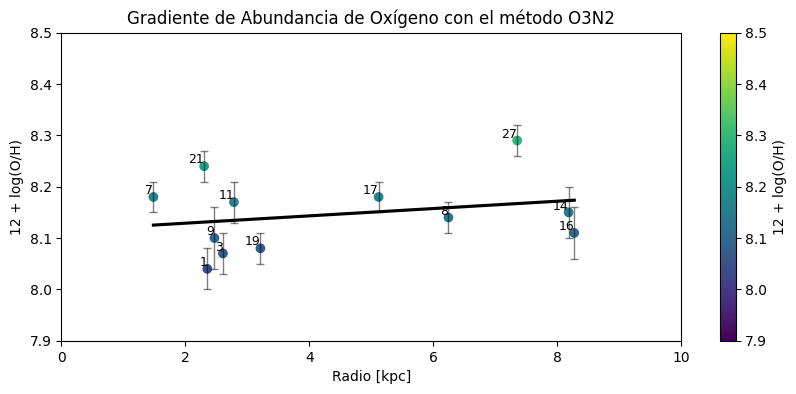

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('txt/gradiente_mask2.tsv', delimiter='\t')
df

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_O3N2'], yerr=df['12_LOG_OH_O3N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)
#plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='o', color='red', capsize=5, label='N2 Error')


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_O3N2'], c=df['12_LOG_OH_O3N2'], cmap='viridis', vmin=7.9, vmax=8.5)


# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)')

sns.regplot(x='r_kpc', y='12_LOG_OH_O3N2', data=df, scatter=False, ci=None, color='black', line_kws={'label':"y={0:.2f}x+{1:.2f}".format(*np.polyfit(df['r_kpc'], df['12_LOG_OH_O3N2'], 1))})

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]')
plt.ylabel('12 + log(O/H)')
plt.title('Gradiente de Abundancia de Oxígeno con el método O3N2')
plt.xlim(0,10)
plt.ylim(7.9,8.5)
# Mostrar la gráfica
plt.show()



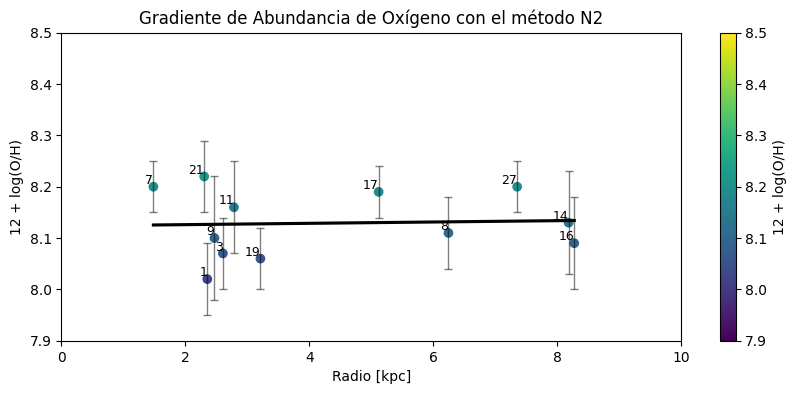

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('txt/gradiente_mask2.tsv', delimiter='\t')

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)
#plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='o', color='red', capsize=5, label='N2 Error')


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['12_LOG_OH_N2'], cmap='viridis', vmin=7.9, vmax=8.5)


# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)')

sns.regplot(x='r_kpc', y='12_LOG_OH_N2', data=df, scatter=False, ci=None, color='black', line_kws={'label':"y={0:.2f}x+{1:.2f}".format(*np.polyfit(df['r_kpc'], df['12_LOG_OH_N2'], 1))})

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]')
plt.ylabel('12 + log(O/H)')
plt.title('Gradiente de Abundancia de Oxígeno con el método N2')
plt.xlim(0,10)
plt.ylim(7.9,8.5)
# Mostrar la gráfica
plt.show()

